In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create and populate SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [3]:
# Create sales table
cursor.execute('''
       CREATE TABLE IF NOT EXISTS sales (
          product_id TEXT NOT NULL,
          quantity INTEGER NOT NULL,
          amount REAL NOT NULL
          )
''')

In [4]:
# Insert sample data
sample_data = [
    ('Phone', 2, 50.00),
    ('Laptop', 2, 1000.00),
    ('Phone', 3, 50.00),
    ('Tablet', 4, 250.00),
    ('Tablet', 1, 300.00),
    ('Laptop', 1, 500.00)
]

In [5]:
cursor.executemany('INSERT OR REPLACE INTO sales (product_id, quantity, amount) VALUES (?, ?, ?)', sample_data)
conn.commit()

In [6]:
# Define and execute SQL query
query = '''
SELECT
     product_id,
     SUM(quantity) AS total_qty,
     ROUND(SUM(quantity * amount), 2) AS revenue
FROM sales
GROUP BY product_id
'''

In [7]:
# Load results into pandas DataFrame
df = pd.read_sql_query(query, conn)

In [8]:
# Close connection
conn.close()

In [9]:
# Print Results
print("\nSales Summary:")
print(df)


Sales Summary:
  product_id  total_qty  revenue
0     Laptop          3   2500.0
1      Phone          5    250.0
2     Tablet          5   1300.0


<Figure size 576x360 with 0 Axes>

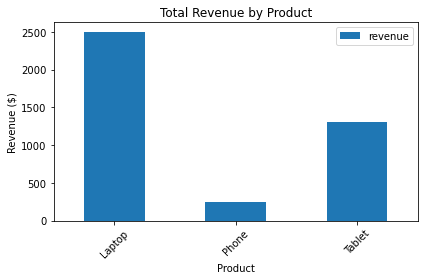

In [10]:
# Create bar chart
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product_id', y='revenue')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart
plt.savefig('sales_chart.png')

# Display chart
plt.show()
